In [200]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def print_top(lst,num):
     #Print the top num items of lst in decreasing order
        s=sorted(lst,key=lambda item: -lst[item])
        print("\tValue\tNode")
        for i in range(0,min(num,len(s))):
             print("{0}\t{1}\t{2}".format(i+1,lst[s[i]],s[i]))
                
def new_list(lst,num):
    s=sorted(lst,key=lambda item: -lst[item])
    newlst = []
    for i in range(0,min(num,len(s))):
        newlst.append(s[i])
#     print(newlst)
    return(newlst)

def sort_list(filename,mylist,num):
    s=sorted(mylist,key=lambda item: -mylist[item])
    with open(filename, 'w') as f:
        for i in range(0,min(num,len(s))):
            print("{0}\t{1}\t{2}".format(i+1,mylist[s[i]],s[i]), file = f) 
            
def make_list(lst,filename):
    s=list(dict.items(lst))
    with open(filename, 'w') as f:
        for i in range(0,len(s)):
            t=s[i][0]
            fst=t[4:]
            print("{0}\t{1}".format(fst,s[i][1]), file = f) 
            
def sort_list2(mylist,filename):
    s=sorted(mylist,key=lambda item: -mylist[item])
    with open(filename, 'w') as f:
        for i in range(0,len(s)):
            print("{0}\t{1}".format(s[i],mylist[s[i]]), file = f) 
            

In [202]:
graph="mCAR.adj_list"
g=nx.read_adjlist(graph,create_using=nx.Graph(),nodetype=str)
degr_centr=nx.degree_centrality(g)
sort_list2(degr_centr,'degr_mCAR')
##################################################################

graph="mTCP.adj_list"
g=nx.read_adjlist(graph,create_using=nx.Graph(),nodetype=str)
degr_centr=nx.degree_centrality(g)
sort_list2(degr_centr,'degr_mTCP')
###################################################################

graph="hCIT.adj_list"
g=nx.read_adjlist(graph,create_using=nx.Graph(),nodetype=str)
degr_centr=nx.degree_centrality(g)
sort_list2(degr_centr,'degr_hCIT')
###################################################################

graph="000.adj_list"
g=nx.read_adjlist(graph,create_using=nx.Graph(),nodetype=str)
degr_centr=nx.degree_centrality(g)
sort_list2(degr_centr,'degr_000')
###################################################################

graph="0T0.adj_list"
g=nx.read_adjlist(graph,create_using=nx.Graph(),nodetype=str)
degr_centr=nx.degree_centrality(g)
sort_list2(degr_centr,'degr_0T0')
###################################################################

graph="AT0.adj_list"
g=nx.read_adjlist(graph,create_using=nx.Graph(),nodetype=str)
degr_centr=nx.degree_centrality(g)
sort_list2(degr_centr,'degr_AT0')
####################################################################

graph="dAT0.adj_list"
g=nx.read_adjlist(graph,create_using=nx.Graph(),nodetype=str)
degr_centr=nx.degree_centrality(g)
sort_list2(degr_centr,'degr_dAT0')

In [203]:
%%bash

# Make a second mCAR closeness file for comparison with hCAR

cp degr_mCAR temp
cut -f1 temp > temp2 
sed -e 's/^.*_//g' temp2 > temp3
awk '{print $1+106}' temp3 > temp4
sed -e 's/[0-9]\+//g' temp2 > temp3
paste temp3 temp4 | sed 's/\t//g' > temp5
paste temp temp5 | awk '{print $3"\t"$2}' > degr_mCAR2
rm temp*

In [204]:
# %%bash
# awk 'NR==FNR {a[$1]=$2; next} $1 in a {print $0, a[$1]}' OFS='\t' degr_mTCP degr_mCAR > temp
# cut -f 1,3 -d$'\t' temp | sort -k2 -n -r > temp2
# paste -d'\t' temp temp2 | cut -d$'\t' -f 1,2,4,5  > scatter_degr_mCAR_mTCP 

In [242]:
%%bash
awk 'NR==FNR {a[$1]=$2; next} $1 in a {print $0, a[$1]}' OFS='\t' degr_mTCP degr_mCAR > scatter_degr_mCAR_mTCP2 

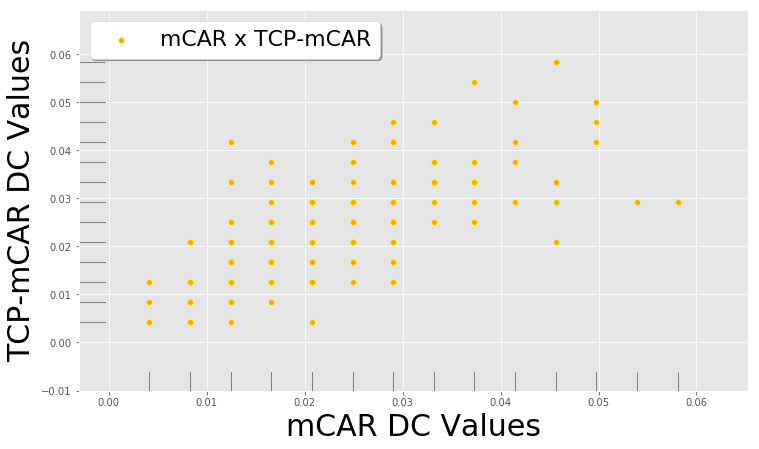

In [287]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(12,7))
df1=pd.read_csv('scatter_degr_mCAR_mTCP2',sep='\t',header=None)
plt.scatter(df1[1], df1[2],color='orange',edgecolor='yellow',zorder=3,s=30,label="mCAR x TCP-mCAR")


sns.rugplot(df1[1], color="gray", axis='x')
sns.rugplot(df1[2], color="gray", axis='y', height=0.04);


# plt.plot(np.unique(df1[1]), np.poly1d(np.polyfit(df1[1], df1[2], 1))(np.unique(df1[1])),alpha=0.5,color="gray")
# plt.axvline(df1.iloc[40,1], color='r', linestyle='dashed', linewidth=2, label='cutoff')
plt.legend(shadow=True,facecolor='white',loc='upper left',fontsize=22)
plt.xlabel('mCAR DC Values',fontsize=30,color='black',labelpad=5)
plt.ylabel('TCP-mCAR DC Values',fontsize=30,color='black',labelpad=5)
# plt.text(0.031,0.01,'16%% cutoff=%.4f' %(df1.iloc[40,1]),fontsize=16,color='k',bbox=dict(facecolor='w',edgecolor='none'))
plt.savefig('CAR_Degree_scatterplot.png')
plt.show()

In [206]:
%%bash
awk 'NR==FNR {a[$1]=$2; next} $1 in a {print $0, a[$1]}' OFS='\t' degr_hCIT degr_mCAR2 > temp
cut -f 1,3 -d$'\t' temp | sort -k2 -n -r > temp2
paste -d'\t' temp temp2 | cut -d$'\t' -f 1,2,4,5  > scatter_degr_mCAR_hCIT 

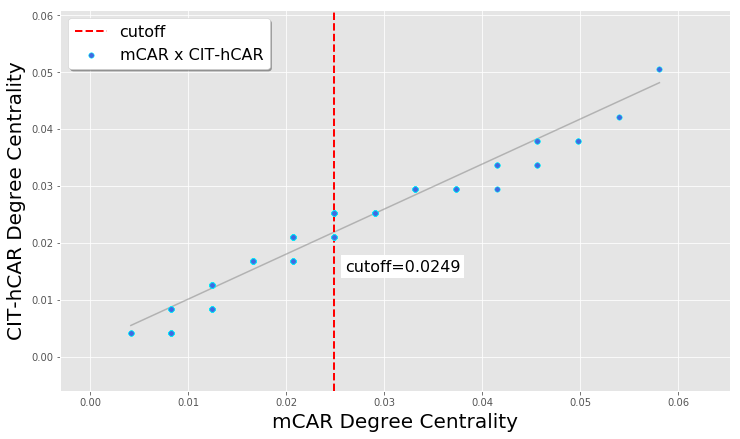

In [240]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(12,7))
df1=pd.read_csv('scatter_degr_mCAR_hCIT',sep='\t',header=None)
plt.scatter(df1[1], df1[3],color='royalblue',edgecolor='cyan',zorder=3,s=30,label="mCAR x CIT-hCAR")

plt.plot(np.unique(df1[1]), np.poly1d(np.polyfit(df1[1], df1[3], 1))(np.unique(df1[1])),alpha=0.5,color="gray")
plt.axvline(df1.iloc[40,1], color='r', linestyle='dashed', linewidth=2, label='cutoff')
plt.legend(shadow=True,facecolor='white',loc='upper left',fontsize=16)
plt.xlabel('mCAR Degree Centrality',fontsize=20,color='black',labelpad=5)
plt.ylabel('CIT-hCAR Degree Centrality',fontsize=20,color='black',labelpad=5)
plt.text(0.026,0.015,'cutoff=%.4f' %(df1.iloc[40,1]),fontsize=16,color='k',bbox=dict(facecolor='w',edgecolor='none'))
plt.savefig('mCAR-hCAR__Degree_scatterplot.png')
plt.show()

In [208]:
%%bash
awk 'NR==FNR {a[$1]=$2; next} $1 in a {print $0, a[$1]}' OFS='\t' degr_000 degr_0T0 > temp
cut -f 1,3 -d$'\t' temp | sort -k2 -n -r > temp2
paste -d'\t' temp temp2 | cut -d$'\t' -f 1,2,4,5  > scatter_degr_000_0T0 

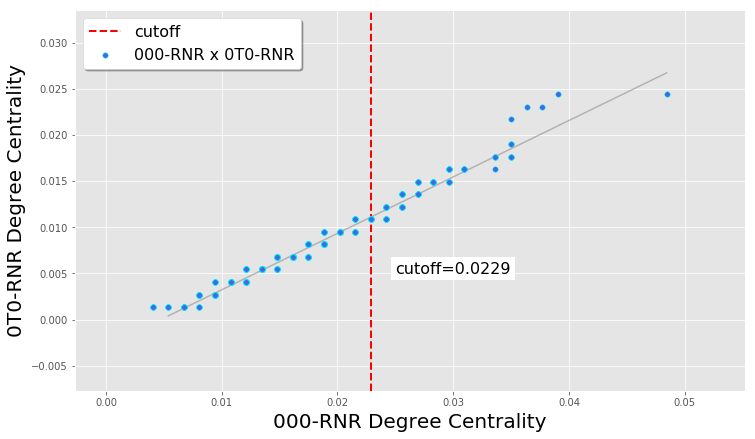

In [222]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(12,7))
df=pd.read_csv('scatter_degr_000_0T0',sep='\t',header=None)
plt.scatter(df[1], df[3],color='royalblue',edgecolor='cyan',zorder=3,s=30,label="000-RNR x 0T0-RNR")

df.drop(df.tail(7).index,inplace=True)
plt.plot(np.unique(df[1]), np.poly1d(np.polyfit(df[1], df[3], 1))(np.unique(df[1])),alpha=0.5,color="gray")

plt.axvline(df.iloc[120,1], color='r', linestyle='dashed', linewidth=2, label='cutoff')
plt.legend(shadow=True,facecolor='white',loc='upper left',fontsize=16)
plt.xlabel('000-RNR Degree Centrality',fontsize=20,color='black',labelpad=5)
plt.ylabel('0T0-RNR Degree Centrality',fontsize=20,color='black',labelpad=5)
plt.text(0.025,0.005,'cutoff=%.4f' %(df.iloc[120,1]),fontsize=16,color='k',bbox=dict(facecolor='w',edgecolor='none'))
plt.savefig('000-0T0_Degree_scatterplot.png')
plt.show()

In [210]:
%%bash
awk 'NR==FNR {a[$1]=$2; next} $1 in a {print $0, a[$1]}' OFS='\t' degr_000 degr_AT0 > temp
cut -f 1,3 -d$'\t' temp | sort -k2 -n -r > temp2
paste -d'\t' temp temp2 | cut -d$'\t' -f 1,2,4,5  > scatter_degr_000_AT0 

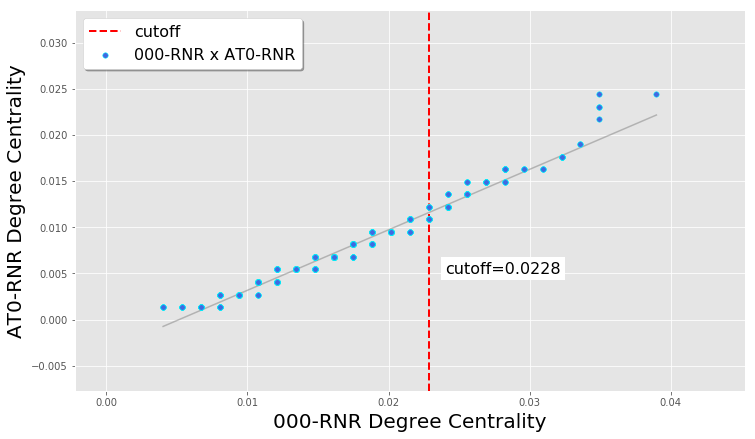

In [224]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(12,7))
df=pd.read_csv('scatter_degr_000_AT0',sep='\t',header=None)
plt.scatter(df[1], df[3],color='royalblue',edgecolor='cyan',zorder=3,s=30,label="000-RNR x AT0-RNR")
plt.plot(np.unique(df[1]), np.poly1d(np.polyfit(df[1], df[3], 1))(np.unique(df[1])),alpha=0.5,color="gray")

plt.axvline(df.iloc[119,1], color='r', linestyle='dashed', linewidth=2, label='cutoff')
plt.legend(shadow=True,facecolor='white',loc='upper left',fontsize=16)
plt.xlabel('000-RNR Degree Centrality',fontsize=20,color='black',labelpad=5)
plt.ylabel('AT0-RNR Degree Centrality',fontsize=20,color='black',labelpad=5)
plt.text(0.024,0.005,'cutoff=%.4f' %(df.iloc[119,1]),fontsize=16,color='k',bbox=dict(facecolor='w',edgecolor='none'))
plt.savefig('000-AT0_Degree_scatterplot.png')
plt.show()

In [212]:
# %%bash
# awk 'NR==FNR {a[$1]=$2; next} $1 in a {print $0, a[$1]}' OFS='\t' degr_000 degr_dAT0 > temp
# cut -f 1,3 -d$'\t' temp | sort -k2 -n -r > temp2
# paste -d'\t' temp temp2 | cut -d$'\t' -f 1,2,4,5  > scatter_degr_000_dAT0 

In [245]:
%%bash
awk 'NR==FNR {a[$1]=$2; next} $1 in a {print $0, a[$1]}' OFS='\t' degr_000 degr_dAT0 > scatter_degr_000_dAT02 

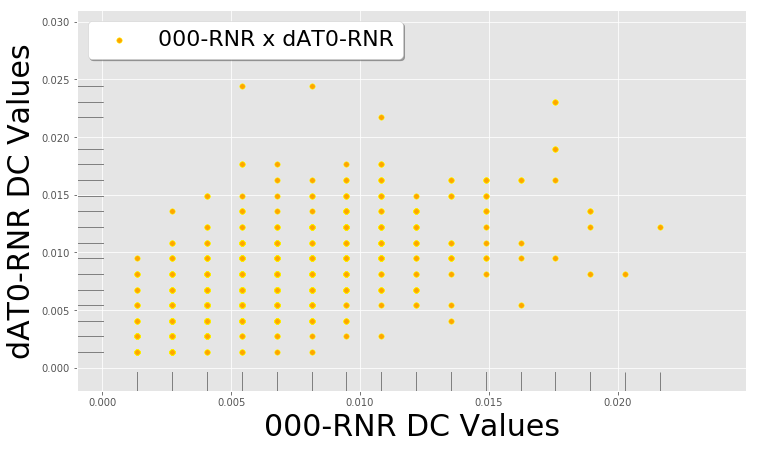

In [286]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(12,7))
df=pd.read_csv('scatter_degr_000_dAT02',sep='\t',header=None)
plt.scatter(df[1], df[2],color='orange',edgecolor='yellow',zorder=3,s=30,label="000-RNR x dAT0-RNR")

# df.drop(df.tail(7).index,inplace=True)
# plt.plot(np.unique(df[1]), np.poly1d(np.polyfit(df[1], df[2], 1))(np.unique(df[1])),alpha=0.5,color="gray")


sns.rugplot(df[1], color="gray", axis='x')
sns.rugplot(df[2], color="gray", axis='y', height=0.04);
plt.xlim(-0.001, 0.025)
plt.ylim(-0.002, 0.031)
plt.xticks(np.arange(0.0, 0.025, 0.005))
plt.yticks(np.arange(0.0, 0.031, 0.005))



# plt.axvline(df.iloc[120,1], color='r', linestyle='dashed', linewidth=2, label='cutoff')
plt.legend(shadow=True,facecolor='white',loc='upper left',fontsize=22)
plt.xlabel('000-RNR DC Values',fontsize=30,color='black',labelpad=5)
plt.ylabel('dAT0-RNR DC Values',fontsize=30,color='black',labelpad=5)
# plt.text(0.010,0.00,'16%% cutoff=%.4f' %(df.iloc[120,1]),fontsize=16,color='k',bbox=dict(facecolor='w',edgecolor='none'))
plt.savefig('RNR_Degree_scatterplot.png')
plt.show()

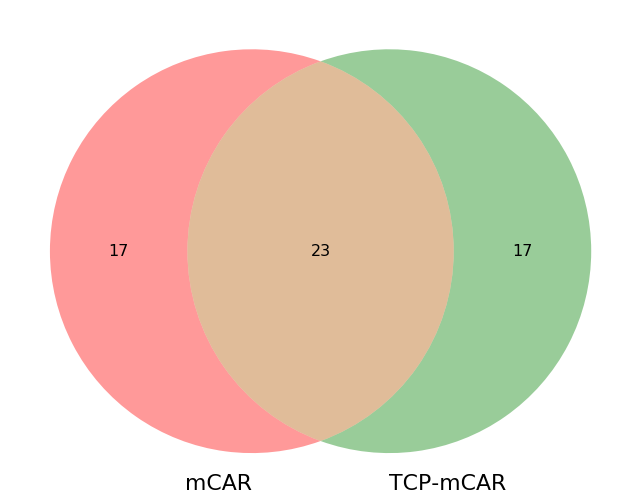

In [229]:
df1=pd.read_csv('scatter_degr_mCAR_mTCP',sep='\t',header=None)
plt.figure(figsize=(12,9))
A=df1.iloc[0:40][0]
B=df1.iloc[0:40][2]
out=venn2([set(A), set(B)],set_labels=('mCAR','TCP-mCAR'))
for text in out.set_labels:
    text.set_fontsize(22)
for text in out.subset_labels:
    text.set_fontsize(16)

plt.savefig('CAR_Degr_intersections.png')
    
plt.show()

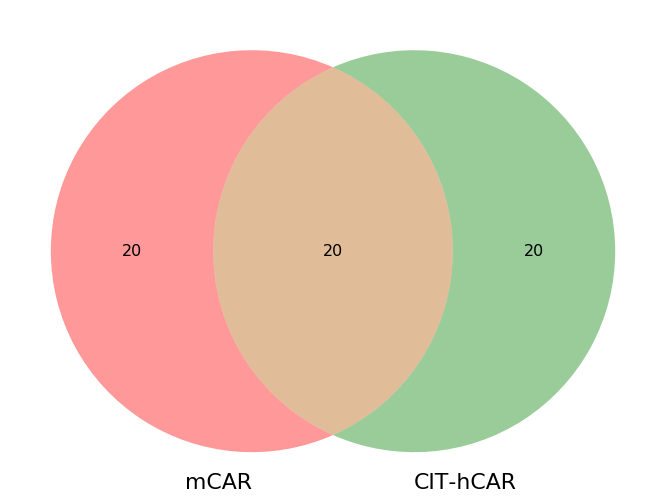

In [230]:
df1=pd.read_csv('scatter_degr_mCAR_hCIT',sep='\t',header=None)
plt.figure(figsize=(12,9))
A=df1.iloc[0:40][0]
B=df1.iloc[0:40][2]
out=venn2([set(A), set(B)],set_labels=('mCAR','CIT-hCAR'))
for text in out.set_labels:
    text.set_fontsize(22)
for text in out.subset_labels:
    text.set_fontsize(16)

plt.savefig('mCAR-hCAR_Degr_intersections.png')
    
plt.show()

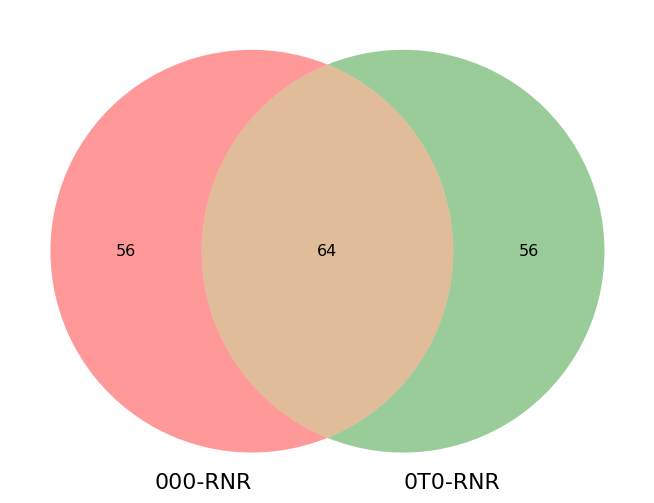

In [231]:
df1=pd.read_csv('scatter_degr_000_0T0',sep='\t',header=None)
plt.figure(figsize=(12,9))
A=df1.iloc[0:120][0]
B=df1.iloc[0:120][2]
out=venn2([set(A), set(B)],set_labels=('000-RNR','0T0-RNR'))
for text in out.set_labels:
    text.set_fontsize(22)
for text in out.subset_labels:
    text.set_fontsize(16)

plt.savefig('000-0T0_Degr_intersections.png')
    
plt.show()

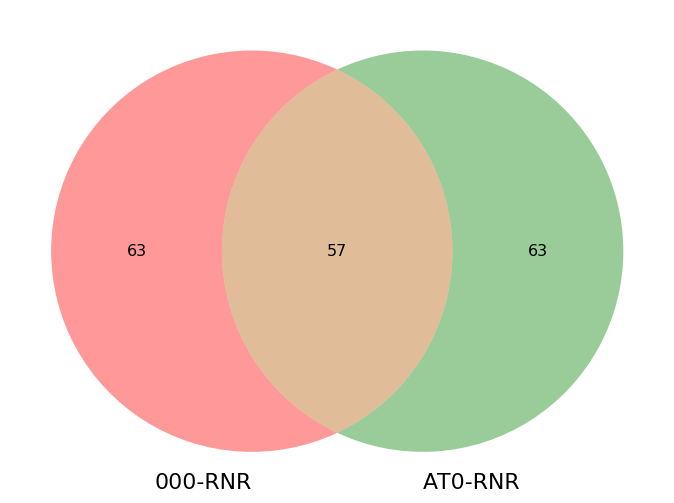

In [232]:
df1=pd.read_csv('scatter_degr_000_AT0',sep='\t',header=None)
plt.figure(figsize=(12,9))
A=df1.iloc[0:120][0]
B=df1.iloc[0:120][2]
out=venn2([set(A), set(B)],set_labels=('000-RNR','AT0-RNR'))
for text in out.set_labels:
    text.set_fontsize(22)
for text in out.subset_labels:
    text.set_fontsize(16)

plt.savefig('000-AT0_Degr_intersections.png')
    
plt.show()

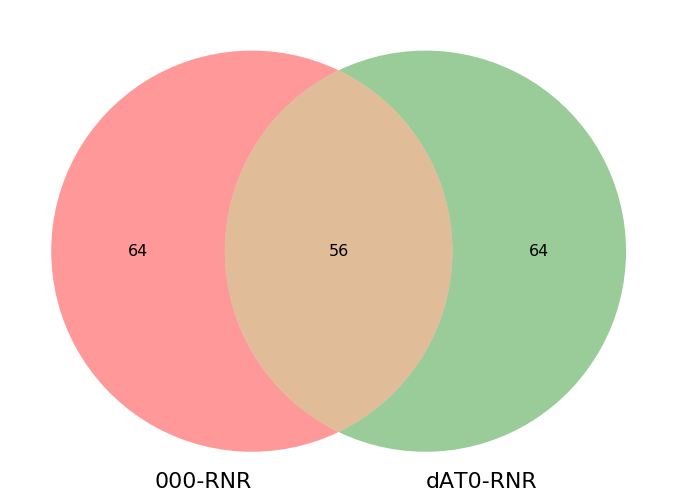

In [253]:
df1=pd.read_csv('scatter_degr_000_dAT0',sep='\t',header=None)
plt.figure(figsize=(12,9))
A=df1.iloc[0:120][0]
B=df1.iloc[0:120][2]
out=venn2([set(A), set(B)],set_labels=('000-RNR','dAT0-RNR'))
for text in out.set_labels:
    text.set_fontsize(22)
for text in out.subset_labels:
    text.set_fontsize(16)

plt.savefig('000-dAT0_Degr_intersections.png')
    
plt.show()

In [236]:
%%bash
head -n 40 scatter_degr_mCAR_mTCP  | awk '{print $1}' > temp
head -n 40 scatter_degr_mCAR_mTCP  | awk '{print $3}' >> temp
sort temp | uniq -d > temp2 #the intersection
sort temp | uniq -u > temp3 #total outside the intersection
cp temp2 tmp2
cp temp2 tmp3
head -n 40 scatter_degr_mCAR_mTCP  | awk '{print $1}' >> tmp2
sort tmp2 | uniq -u > tmp && mv tmp tmp2 #outside the intersection mCAR
head -n 40 scatter_degr_mCAR_mTCP  | awk '{print $3}' >> tmp3
sort tmp3 | uniq -u > tmp && mv tmp tmp3 #outside the intersection mTCP

awk '{gsub(/[^0-9.]/,"")}1' temp2 > tmp && mv tmp temp2
awk '{print "select"" "":"$1}' temp2 > join_mCAR-mTCP.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp2 > tmp && mv tmp tmp2
awk '{print "select"" "":"$1}' tmp2 > notjoin_mCAR-mTCP.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp3 > tmp && mv tmp tmp3
awk '{print "select"" "":"$1}' tmp3 > notjoin_mTCP-mCAR.cmd
rm tmp* temp*

In [235]:
%%bash
head -n 40 scatter_degr_mCAR_hCIT  | awk '{print $1}' > temp
head -n 40 scatter_degr_mCAR_hCIT  | awk '{print $3}' >> temp
sort temp | uniq -d > temp2 #the intersection
sort temp | uniq -u > temp3 #total outside the intersection
cp temp2 tmp2
cp temp2 tmp3
head -n 40 scatter_degr_mCAR_hCIT  | awk '{print $1}' >> tmp2
sort tmp2 | uniq -u > tmp && mv tmp tmp2 #outside the intersection mCAR
head -n 40 scatter_degr_mCAR_hCIT  | awk '{print $3}' >> tmp3
sort tmp3 | uniq -u > tmp && mv tmp tmp3 #outside the intersection hCIT

awk '{gsub(/[^0-9.]/,"")}1' temp2 > tmp && mv tmp temp2
awk '{print "select"" "":"$1}' temp2 > join_mCAR-hCIT.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp2 > tmp && mv tmp tmp2
awk '{print "select"" "":"$1}' tmp2 > notjoin_mCAR-hCIT.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp3 > tmp && mv tmp tmp3
awk '{print "select"" "":"$1}' tmp3 > notjoin_hCIT-mCAR.cmd
# rm tmp* temp*

In [237]:
%%bash
head -n 120 scatter_degr_000_0T0  | awk '{print $1}' > temp
head -n 120 scatter_degr_000_0T0  | awk '{print $3}' >> temp
sort temp | uniq -d > temp2 #the intersection
sort temp | uniq -u > temp3 #total outside the intersection
cp temp2 tmp2
cp temp2 tmp3
head -n 120 scatter_degr_000_0T0  | awk '{print $1}' >> tmp2
sort tmp2 | uniq -u > tmp && mv tmp tmp2 #outside the intersection 000
head -n 120 scatter_degr_000_0T0  | awk '{print $3}' >> tmp3
sort tmp3 | uniq -u > tmp && mv tmp tmp3 #outside the intersection 0T0

awk '{gsub(/[^0-9.]/,"")}1' temp2 > tmp && mv tmp temp2
awk '{print "select"" "":"$1}' temp2 > join_000_0T0.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp2 > tmp && mv tmp tmp2
awk '{print "select"" "":"$1}' tmp2 > notjoin_000-0T0.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp3 > tmp && mv tmp tmp3
awk '{print "select"" "":"$1}' tmp3 > notjoin_0T0-000.cmd
rm tmp* temp*

In [238]:
%%bash
head -n 120 scatter_degr_000_AT0  | awk '{print $1}' > temp
head -n 120 scatter_degr_000_AT0  | awk '{print $3}' >> temp
sort temp | uniq -d > temp2 #the intersection
sort temp | uniq -u > temp3 #total outside the intersection
cp temp2 tmp2
cp temp2 tmp3
head -n 120 scatter_degr_000_AT0  | awk '{print $1}' >> tmp2
sort tmp2 | uniq -u > tmp && mv tmp tmp2 #outside the intersection 000
head -n 120 scatter_degr_000_AT0  | awk '{print $3}' >> tmp3
sort tmp3 | uniq -u > tmp && mv tmp tmp3 #outside the intersection AT0

awk '{gsub(/[^0-9.]/,"")}1' temp2 > tmp && mv tmp temp2
awk '{print "select"" "":"$1}' temp2 > join_000-AT0.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp2 > tmp && mv tmp tmp2
awk '{print "select"" "":"$1}' tmp2 > notjoin_000-AT0.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp3 > tmp && mv tmp tmp3
awk '{print "select"" "":"$1}' tmp3 > notjoin_AT0-000.cmd
rm tmp* temp*

In [239]:
%%bash
head -n 120 scatter_degr_000_dAT0  | awk '{print $1}' > temp
head -n 120 scatter_degr_000_dAT0  | awk '{print $3}' >> temp
sort temp | uniq -d > temp2 #the intersection
sort temp | uniq -u > temp3 #total outside the intersection
cp temp2 tmp2
cp temp2 tmp3
head -n 120 scatter_degr_000_dAT0  | awk '{print $1}' >> tmp2
sort tmp2 | uniq -u > tmp && mv tmp tmp2 #outside the intersection 000
head -n 120 scatter_degr_000_dAT0  | awk '{print $3}' >> tmp3
sort tmp3 | uniq -u > tmp && mv tmp tmp3 #outside the intersection dAT0

awk '{gsub(/[^0-9.]/,"")}1' temp2 > tmp && mv tmp temp2
awk '{print "select"" "":"$1}' temp2 > join_000-dAT0.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp2 > tmp && mv tmp tmp2
awk '{print "select"" "":"$1}' tmp2 > notjoin_000-dAT0.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp3 > tmp && mv tmp tmp3
awk '{print "select"" "":"$1}' tmp3 > notjoin_dAT0-000.cmd
rm tmp* temp*

# Closeness Assignment Files

In [39]:
%%bash


cut -f 3 -d$'\t' mCAR_close | awk '{gsub(/[^0-9. ]/,"")}1' > temp
cut -f 2 -d$'\t' mCAR_close > temp2
paste -d' ' <(awk '{print " "$1}' temp ) <(awk '{print "\t"$1}' temp2 ) |sed 's/ //g' | sort -k1 -n | awk '{print "\t"":"$1"\t"$2}' > mCAR_close.asn

cut -f 3 -d$'\t' mTCP_close | awk '{gsub(/[^0-9. ]/,"")}1' > temp
cut -f 2 -d$'\t' mTCP_close > temp2
paste -d' ' <(awk '{print " "$1}' temp ) <(awk '{print "\t"$1}' temp2 ) |sed 's/ //g' | sort -k1 -n | awk '{print "\t"":"$1"\t"$2}' > mTCP_close.asn 

cut -f 3 -d$'\t' hCAR_close | awk '{gsub(/[^0-9. ]/,"")}1' > temp
cut -f 2 -d$'\t' hCAR_close > temp2
paste -d' ' <(awk '{print " "$1}' temp ) <(awk '{print "\t"$1}' temp2 ) |sed 's/ //g' | sort -k1 -n | awk '{print "\t"":"$1"\t"$2}' > hCAR_close.asn 

cut -f 3 -d$'\t' 000_close | awk '{gsub(/[^0-9. ]/,"")}1' > temp
cut -f 2 -d$'\t' 000_close > temp2
paste -d' ' <(awk '{print " "$1}' temp ) <(awk '{print "\t"$1}' temp2 ) |sed 's/ //g' | sort -k1 -n | awk '{print "\t"":"$1"\t"$2}' > 000_close.asn 

cut -f 3 -d$'\t' 0T0_close | awk '{gsub(/[^0-9. ]/,"")}1' > temp
cut -f 2 -d$'\t' 0T0_close > temp2
paste -d' ' <(awk '{print " "$1}' temp ) <(awk '{print "\t"$1}' temp2 ) |sed 's/ //g' | sort -k1 -n | awk '{print "\t"":"$1"\t"$2}' > 0T0_close.asn 

cut -f 3 -d$'\t' AT0_close | awk '{gsub(/[^0-9. ]/,"")}1' > temp
cut -f 2 -d$'\t' AT0_close > temp2
paste -d' ' <(awk '{print " "$1}' temp ) <(awk '{print "\t"$1}' temp2 ) |sed 's/ //g' | sort -k1 -n | awk '{print "\t"":"$1"\t"$2}' > AT0_close.asn 

cut -f 3 -d$'\t' dAT0_close | awk '{gsub(/[^0-9. ]/,"")}1' > temp
cut -f 2 -d$'\t' dAT0_close > temp2
paste -d' ' <(awk '{print " "$1}' temp ) <(awk '{print "\t"$1}' temp2 ) |sed 's/ //g' | sort -k1 -n | awk '{print "\t"":"$1"\t"$2}' > dAT0_close.asn 
